# Part 7 -- Tuning Hyperparameters (Random Forest Classifier)

Using GridSearchCV to find the best parameters to optimize our model.

**Load lib codes**

In [1]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()

In [2]:
X_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_train.pickle')

In [3]:
y_train = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_train.pickle')

In [4]:
X_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_test.pickle')

In [5]:
y_test = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.y_test.pickle')

In [6]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [8]:
print("Training set score: \t{}".format(rf.score(X_train, y_train)))
print("Test set score: \t{}".format(rf.score(X_test, y_test)))

Training set score: 	0.9516389994498916
Test set score: 	0.5645223919233756


In [9]:
params = {
        'max_depth': [5,10,20,30,40],
        'min_samples_leaf': [1,2,5,8],
        'criterion': ['gini','entropy'],
}

In [10]:
rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1, cv=StratifiedShuffleSplit(n_splits=5, random_state=42))

In [11]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 5, 8], 'max_depth': [5, 10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
cv_results = pd.DataFrame(rf_gs.cv_results_)
cv_results[['mean_test_score', 'mean_train_score','params', 'rank_test_score']][(cv_results['rank_test_score']==1)].T

,12
mean_test_score,0.572788
mean_train_score,0.585068
params,"{'criterion': 'gini', 'min_samples_leaf': 1, '..."
rank_test_score,1


In [13]:
pd.DataFrame(rf_gs.predict(X_test)).sample(5)

,0
6227,0
4825,0
12448,0
5267,0
10498,0


In [14]:
pd.DataFrame(rf_gs.predict_proba(X_test)).sample(5)

,0,1
7305,0.561751,0.438249
11298,0.561751,0.438249
7797,0.561751,0.438249
10038,0.561751,0.438249
9956,0.567622,0.432378


# HOW DO I TIE THIS BACK TO WORDS? WHAT DO THESE MEAN?

In [57]:
X_tfidf = joblib.load(../Analyzing_Unstructured_Data_for_Finance/data/)

SyntaxError: invalid syntax (<ipython-input-57-7cac870749f9>, line 1)

In [ ]:
X_test[15442]

In [ ]:
tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.tfidf_transformer.pickle')

In [ ]:
tfidf.inverse_transform(X_test[15431])

In [15]:
rf_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

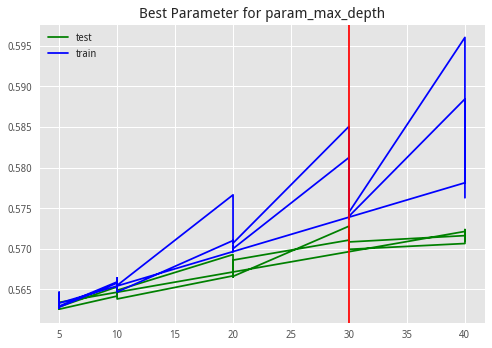

In [16]:
model_graph = pd.DataFrame(rf_gs.cv_results_)
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'], c='g', label='test')
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'], c='b', label='train')
plt.axvline(rf_gs.best_estimator_.max_depth, c='r')
# plt.xscale("log")
plt.title("Best Parameter for param_max_depth")
plt.legend()

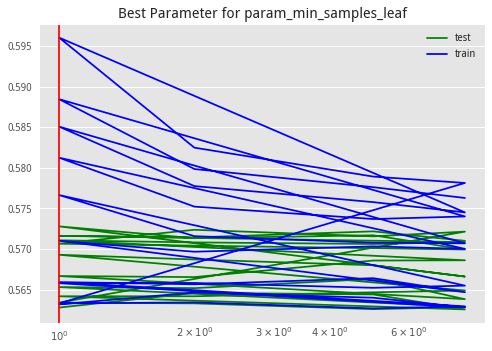

In [17]:
model_graph = pd.DataFrame(rf_gs.cv_results_)
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'], c='g', label='test')
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'], c='b', label='train')
plt.axvline(rf_gs.best_estimator_.min_samples_leaf, c='r')
plt.xscale("log")
plt.title("Best Parameter for param_min_samples_leaf")
plt.legend()